# ***Check GPU connect***

In [11]:
print("oke nice")

oke nice


In [12]:
import torch 

print(torch.__version__) 
print(torch.cuda.is_available()) 
print(torch.cuda.get_device_name(0))

2.4.0
True
Tesla T4


In [13]:
!nvidia-smi

Thu Sep 26 12:05:19 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       3MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# ***Content***

## Clone dataset 

In [14]:
!pip install gdown

In [15]:
!git clone https://github.com/QuanHoangNgoc/data-temp.git

Cloning into 'data-temp'...
remote: Enumerating objects: 18218, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 18218 (delta 0), reused 3 (delta 0), pack-reused 18215 (from 1)
Receiving objects: 100% (18218/18218), 552.74 MiB | 45.29 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Updating files: 100% (18149/18149), done.


## Install

In [16]:
# !pip -q install sentence-transformers
!pip -q install faiss-gpu

In [17]:
import os
from PIL import Image
import numpy as np
import faiss
# from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import random

## Check dataset and create image_files 

In [18]:
def get_imagelist(root_folder, glob="jpg"): 
    paths = []
    for dirpath, dirnames, filenames in sorted(os.walk(root_folder)): #!!! must sorted 
        for file in filenames:  
            fullpath = os.path.join(dirpath, file)
            if(fullpath.split(".")[-1] != glob): continue
            paths.append(fullpath) 
    return paths

18148 ['/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_72.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_44.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_238.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_119.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_173.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_255.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_82.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_134.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_185.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_169.jpg']


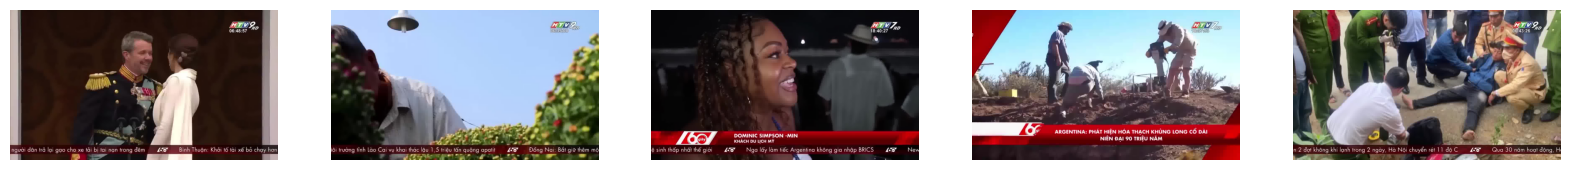

In [19]:
image_folder = "/kaggle/working/data-temp"

image_files = get_imagelist(image_folder)
print(len(image_files), image_files[:10]) 
selected_files = random.sample(image_files, 5)

plt.figure(figsize=(20, 5))

for i, file in enumerate(selected_files):
    image = Image.open(file)
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.axis("off")

plt.show()

## Create embeddings and meta 

In [20]:
# # new a embedding model 
# model = SentenceTransformer('clip-ViT-B-32')

# CHUNK_SIZE = 256

# # process each chunk 
# def process_chunk(chunk):
#     images = []
#     for image_file in chunk: images.append(Image.open(image_file))

#     chunk_embeddings = model.encode(images)
#     return chunk_embeddings


# # create the embeddings 
# embeddings = []
# for i in range(0, len(image_files), CHUNK_SIZE):
#     print(i)
#     chunk = image_files[i:i + CHUNK_SIZE]
#     embeddings.extend(process_chunk(chunk))
    
# embeddings 

In [21]:
import gdown  

def drive_down(file_id, name_output_file): 
    url = f'https://drive.google.com/uc?id={file_id}'  
    output = name_output_file  
    gdown.download(url, output, quiet=False)

### clone embedding 

In [22]:
file_id = '1XdR4P7RyK68wGruH1Fw2GNyiNpRHYLpT' 
drive_down(file_id, "emb.npy")
embeddings = np.load('emb.npy')

Downloading...
From (original): https://drive.google.com/uc?id=1XdR4P7RyK68wGruH1Fw2GNyiNpRHYLpT
From (redirected): https://drive.google.com/uc?id=1XdR4P7RyK68wGruH1Fw2GNyiNpRHYLpT&confirm=t&uuid=d0dba759-a90f-43b4-9ec6-9d62ad191f2b
To: /kaggle/working/emb.npy
100%|██████████| 3.48G/3.48G [00:42<00:00, 82.6MB/s]


In [23]:
embeddings.shape 

(849188, 1024)

### clone meta

In [24]:
file_id = '1B-QZqlyoLW8oc4lyi6_tnV7MoUDA84Z-'
drive_down(file_id, "meta.pkl")

import pickle

with open('meta.pkl', 'rb') as file:
    meta = pickle.load(file)

Downloading...
From: https://drive.google.com/uc?id=1B-QZqlyoLW8oc4lyi6_tnV7MoUDA84Z-
To: /kaggle/working/meta.pkl
100%|██████████| 16.2M/16.2M [00:00<00:00, 53.1MB/s]


In [25]:
print(type(meta), len(meta), meta[:10])

<class 'list'> 849188 ['L01_V001_1.jpg', 'L01_V001_2.jpg', 'L01_V001_3.jpg', 'L01_V001_4.jpg', 'L01_V001_5.jpg', 'L01_V001_6.jpg', 'L01_V001_7.jpg', 'L01_V001_8.jpg', 'L01_V001_9.jpg', 'L01_V001_10.jpg']


## Create database 

In [26]:
# build vector db 
def create_database(embeddings): 
    dimension = len(embeddings[0])
    db = faiss.IndexFlatIP(dimension)
    db = faiss.IndexIDMap(db)

    # insert embeddings into database 
    vectors = np.array(embeddings).astype('float32')
    db.add_with_ids(vectors, np.array(range(len(embeddings))))
    return db 

In [27]:
db = create_database(embeddings)
db 

<faiss.swigfaiss.IndexIDMap; proxy of <Swig Object of type 'faiss::IndexIDMapTemplate< faiss::Index > *' at 0x7e18f40a2190> >

## Search

In [28]:
!pip install sentence-transformers==2.2.2
!pip install torchscale

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 985.2 kB/s eta 0:00:00 0:00:01m
  Preparing metadata (setup.py) ... done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125924 sha256=9f071e072650e4923bcfd9c0f23eb66f7b27011aca7d6042ac70265af8f33c20
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 kB 1.7 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.2/71.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 7.6 MB/s eta 0:00:00:00:0100:01
  Created wheel for fairscale: filename=fairscale-0.4.0-py3-none-any.whl size=239917 sha256=3dc133942ab

### set-up beit3 repo

In [29]:
file_id = '1Xf3XDVR59ONPNemQ0URS7-djDGssfXaN'
drive_down(file_id, "beit3.zip")
# !unzip beit3.zip 

Downloading...
From: https://drive.google.com/uc?id=1Xf3XDVR59ONPNemQ0URS7-djDGssfXaN
To: /kaggle/working/beit3.zip
100%|██████████| 708k/708k [00:00<00:00, 85.4MB/s]


In [30]:
!unzip beit3.zip 

Archive:  beit3.zip
   creating: BEiT3/
  inflating: BEiT3/beit3.py          
   creating: BEiT3/checkpoints/
  inflating: BEiT3/checkpoints/beit3.spm  
  inflating: BEiT3/datasets.py       
  inflating: BEiT3/engine_for_finetuning.py  
  inflating: BEiT3/glossary.py       
  inflating: BEiT3/modeling_finetune.py  
  inflating: BEiT3/modeling_utils.py  
  inflating: BEiT3/optim_factory.py  
  inflating: BEiT3/randaug.py        
  inflating: BEiT3/run_beit3_finetuning.py  
  inflating: BEiT3/test_similarity.py  
  inflating: BEiT3/utils_beit.py     
   creating: BEiT3/__pycache__/


In [31]:
os.listdir('/kaggle/working/BEiT3/checkpoints')

['beit3.spm']

In [32]:
file_id = '1e8qULfZLu26e8-wHdtJxCC6wfG72IWMp'
drive_down(file_id, "beit3.pth")

Downloading...
From (original): https://drive.google.com/uc?id=1e8qULfZLu26e8-wHdtJxCC6wfG72IWMp
From (redirected): https://drive.google.com/uc?id=1e8qULfZLu26e8-wHdtJxCC6wfG72IWMp&confirm=t&uuid=a7ec5382-1bb1-4382-9ec3-054f74f5a473
To: /kaggle/working/beit3.pth
100%|██████████| 1.35G/1.35G [00:39<00:00, 33.8MB/s]


### beit3 encoder model 

In [33]:
import BEiT3.beit3 as module

In [34]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
checkpoint = "beit3.pth"
sentencepiece_model = os.path.join('/kaggle/working/BEiT3/checkpoints', 'beit3.spm')

In [35]:
model, transform, tokenizer = module.load_model(device, checkpoint, sentencepiece_model)

/kaggle/working/BEiT3/utils_beit.py:526: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(ckpt_path, map_location='cpu')


Load ckpt from beit3.pth
Load state_dict by model_key = model


/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


### search on db

In [36]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=e5ead18905dd190e7e3edd4fc36253df6498ff3027a4c296bf0e510965e78ebc
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.

In [37]:
from googletrans import Translator
translator = Translator()

In [38]:
def search(query, db, meta, top_k=100):
    # Query can be image-path or text
    if query.endswith(".jpg"): query = Image.open(query) #!!! not process with image 
    
    text = translator.translate(query, dest='en').text
    emb = module.encode_text(model, tokenizer, text, device)
    print("-", text, emb.shape)
    
    concat_emb = emb.astype("float32").reshape(1, -1)
    rels, indices = db.search(concat_emb, top_k)
    print("-", indices[0][:10])
    print("-", rels[0][:10])

    retrieved_meta = [meta[i] for i in indices[0]]
    print("- ANSWER IS:", retrieved_meta[:10], "\n\n")
    return query, retrieved_meta

In [39]:
query = "Một con thuyền chạy được trên băng, màu đen. Con thuyền này chạy bằng động cơ cánh quạt ở bên trên thổi hướng ra phía sau. Con thuyền là phương tiện hỗ trợ cứu hộ một nạn nhân bị rơi xuống hồ băng."
# search(query, db, meta, top_k=100)

In [40]:
def mapping_frame(x): 
    frame_idx = int(x.split('_')[-1].split('.')[0])
    frame_idx = (frame_idx-1) * 25 
    video = x.split('_')[0] + '_' + x.split('_')[1]
    return frame_idx, video 

## Main script

In [41]:
import shutil, csv

def main_submit(in_folder, out_folder):
    if os.path.exists(out_folder): 
        shutil.rmtree(out_folder)
    os.makedirs(out_folder, exist_ok=True)
    print(f"-\/- Remove and renew [{out_folder}]")
    
    for namefile in os.listdir(in_folder):
        with open(os.path.join(in_folder, namefile), 'r') as file:
            # Read the entire file content
            content = file.read()
            content = content.replace("\n", " ")  
            
            # Get retrival list and deformat it 
            _, lst = search(content, db, meta, top_k=100) #!!! main 
            new_list = [] 
            for x in lst: 
                frame_idx, video = mapping_frame(x) #!!! mapping 
                new_list.append([video, frame_idx])
            print(new_list[:10], "\n\n") 
            
            # Write file csv 
            path = os.path.join(out_folder, namefile.replace(".txt", ".csv"))
            with open(path, 'w', newline='') as csvfile:
                # Create a CSV writer object
                writer = csv.writer(csvfile)
    
                # Write the data to the CSV file
                writer.writerows(new_list) 

In [42]:
in_folder = '/kaggle/input/query1-test/pack2-groupA'
out_folder = '/kaggle/working/submit'
# main_submit(in_folder, out_folder)

In [43]:
# Specify the folder to compress and the output ZIP file name  
folder_to_compress = '/kaggle/working/submit' 
output_zip_file = '/kaggle/working/submit.zip'  

# Compress the runs to zip 
shutil.make_archive(output_zip_file.replace('.zip', ''), 'zip', folder_to_compress)

'/kaggle/working/submit.zip'

## Text Customize 

In [77]:
def export_csv(new_list): 
    # Write file csv 
    path = 'data.csv'
    with open(path, 'w', newline='') as csvfile:
        # Create a CSV writer object
        writer = csv.writer(csvfile)

        # Write the data to the CSV file
        writer.writerows(new_list) 
        
def deformat_list(lst): 
    new_list = [] 
    for x in lst: 
        frame_idx, video = mapping_frame(x) #!!! mapping 
        new_list.append([video, frame_idx])
    print(new_list[:10], "\n\n") 
    return new_list

In [85]:
def text_query(content, top_k): 
    # Format content 
    content = content.replace("\n", " ")  
            
    # Get retrival list and deformat it 
    _, lst = search(content, db, meta, top_k=top_k) #!!! main 
    new_list = deformat_list(lst) 
    export_csv(new_list)

In [109]:
content = "Một người đi bộ"
text_query(content, 100)

- A pedestrian (1, 1024)
- [285444 285445 285430 285447 285442 285448 285449 285451 285443 285450]
- [0.66331476 0.6608949  0.66025424 0.6600035  0.6594791  0.65916455
 0.65867764 0.65815973 0.6578549  0.65602314]
- ANSWER IS: ['L08_V028_1227.jpg', 'L08_V028_1228.jpg', 'L08_V028_1213.jpg', 'L08_V028_1230.jpg', 'L08_V028_1225.jpg', 'L08_V028_1231.jpg', 'L08_V028_1232.jpg', 'L08_V028_1234.jpg', 'L08_V028_1226.jpg', 'L08_V028_1233.jpg'] 


[['L08_V028', 30650], ['L08_V028', 30675], ['L08_V028', 30300], ['L08_V028', 30725], ['L08_V028', 30600], ['L08_V028', 30750], ['L08_V028', 30775], ['L08_V028', 30825], ['L08_V028', 30625], ['L08_V028', 30800]] 




## Image Customize 

In [92]:
def search_with_image(query, db, meta, top_k=100):
    # Query can be image-path or text
    if query.endswith(".jpg"): image = Image.open(query) 
    else: assert 0 
    
    emb = module.encode_image(model, transform, image, device)
    print("-", path, type(image), emb.shape)
    
    concat_emb = emb.astype("float32").reshape(1, -1)
    rels, indices = db.search(concat_emb, top_k)
    print("-", indices[0][:10])
    print("-", rels[0][:10])

    retrieved_meta = [meta[i] for i in indices[0]]
    print("- ANSWER IS:", retrieved_meta[:10], "\n\n")
    return query, retrieved_meta

In [125]:
def image_query(path, top_k): 
    # Get retrival list and deformat it 
    _, lst = search_with_image(path, db, meta, top_k=top_k) #!!! main 
    new_list = deformat_list(lst) 
    export_csv(new_list)
    
    plt.imshow(Image.open(path))
    plt.axis("off")
    plt.show()

/kaggle/working/BEiT3/beit3.py:391: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast():


- /kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_223.jpg <class 'PIL.JpegImagePlugin.JpegImageFile'> (1, 1024)
- [216728 216726 232855 216725 232856 224691 233966 216727 460314 216724]
- [0.9999979  0.9898304  0.9871998  0.98335356 0.9831877  0.9831861
 0.981835   0.98118937 0.9811765  0.9809409 ]
- ANSWER IS: ['L07_V001_889.jpg', 'L07_V001_887.jpg', 'L07_V015_905.jpg', 'L07_V001_886.jpg', 'L07_V015_906.jpg', 'L07_V008_1013.jpg', 'L07_V016_1022.jpg', 'L07_V001_888.jpg', 'L13_V020_1100.jpg', 'L07_V001_885.jpg'] 


[['L07_V001', 22200], ['L07_V001', 22150], ['L07_V015', 22600], ['L07_V001', 22125], ['L07_V015', 22625], ['L07_V008', 25300], ['L07_V016', 25525], ['L07_V001', 22175], ['L13_V020', 27475], ['L07_V001', 22100]] 




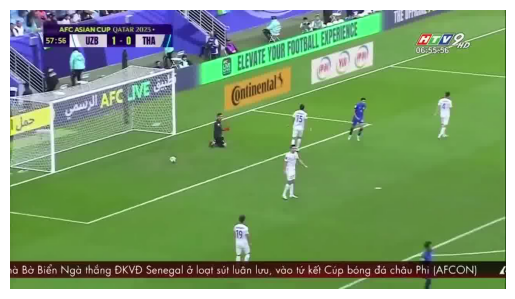

In [126]:
path = image_files[100]
image_query(path, 100) 

## Text-Image Customize 

In [120]:
def normalize_matrix(embeddings): 
    matrix = np.array(embeddings).astype('float32')
    matrix_norm = matrix / np.linalg.norm(matrix, axis=1, keepdims=True)  # Normalize each vector in matrix 
    return matrix_norm 

matrix_norm = normalize_matrix(embeddings)

def search_with_text_image(content, path, K):
    # Format content 
    content = content.replace("\n", " ")  
    text = translator.translate(content, dest='en').text
    image = Image.open(path)
    
    image_emb = module.encode_image(model, transform, image, device)
    image_emb = normalize_matrix(image_emb).reshape(-1) 

    text_emb = module.encode_text(model, tokenizer, text, device)
    text_emb = normalize_matrix(text_emb).reshape(-1) 
    
    print("-", text, "\n", path, "\n", image_emb.shape, text_emb.shape)

    cosine_similarities = np.dot(matrix_norm, image_emb) * np.dot(matrix_norm, text_emb)
    top_k_indices = np.argsort(cosine_similarities)[-K:][::-1]
    print("-", cosine_similarities[top_k_indices][:10])
    print("-", top_k_indices[:10])
    
    retrieved_meta = [meta[i] for i in top_k_indices]
    print("- ANSWER IS:", retrieved_meta[:10], "\n\n")
    return query, retrieved_meta

In [127]:
def text_image_query(content, path, top_k): 
    # Get retrival list and deformat it 
    _, lst = search_with_text_image(content, path, top_k) 
    new_list = deformat_list(lst) 
    export_csv(new_list)
    
    plt.imshow(Image.open(path))
    plt.axis("off")
    plt.show()

/kaggle/working/BEiT3/beit3.py:432: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast():


- A person wearing a yellow shirt in this scene 
 /kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_103.jpg 
 (1024,) (1024,)
- [0.6008008  0.5969301  0.59575856 0.59382385 0.5937728  0.5903791
 0.59017664 0.58379585 0.58369577 0.58282995]
- [216248 216243 216245 216242 216244 796132 261795 430596 607342 430595]
- ANSWER IS: ['L07_V001_409.jpg', 'L07_V001_404.jpg', 'L07_V001_406.jpg', 'L07_V001_403.jpg', 'L07_V001_405.jpg', 'L22_V017_919.jpg', 'L08_V009_844.jpg', 'L12_V025_803.jpg', 'L17_V018_487.jpg', 'L12_V025_802.jpg'] 


[['L07_V001', 10200], ['L07_V001', 10075], ['L07_V001', 10125], ['L07_V001', 10050], ['L07_V001', 10100], ['L22_V017', 22950], ['L08_V009', 21075], ['L12_V025', 20050], ['L17_V018', 12150], ['L12_V025', 20025]] 




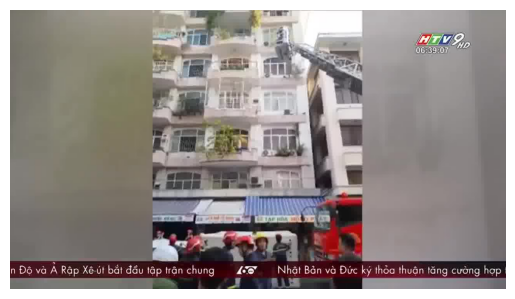

In [128]:
content = "Một người mặc áo màu vàng trong khung cảnh này"
path = image_files[20]
text_image_query(content, path, 100)